### Assignment 5.1
Section 3.4

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

17464789/17464789 [==============================] - 1s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [15]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
from keras import losses, metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 30ms/step - loss: 0.5169 - acc: 0.8055 - val_loss: 0.3999 - val_acc: 0.8648
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3163 - acc: 0.9039 - val_loss: 0.3152 - val_acc: 0.8849
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2335 - acc: 0.9255 - val_loss: 0.2920 - val_acc: 0.8840
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1840 - acc: 0.9405 - val_loss: 0.2720 - val_acc: 0.8919
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1506 - acc: 0.9527 - val_loss: 0.2823 - val_acc: 0.8882
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1229 - acc: 0.9642 - val_loss: 0.2860 - val_acc: 0.8869
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1040 - acc: 0.9674 - val_loss: 0.3004 - val_acc: 0.8865
Epoch 8/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0888 - acc: 0.9

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

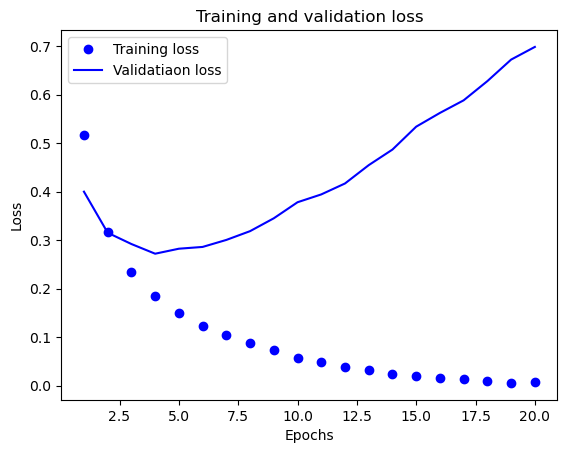

In [24]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs,loss_values, 'bo', label="Training loss")
plt.plot(epochs,val_loss_values, 'b', label="Validatiaon loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


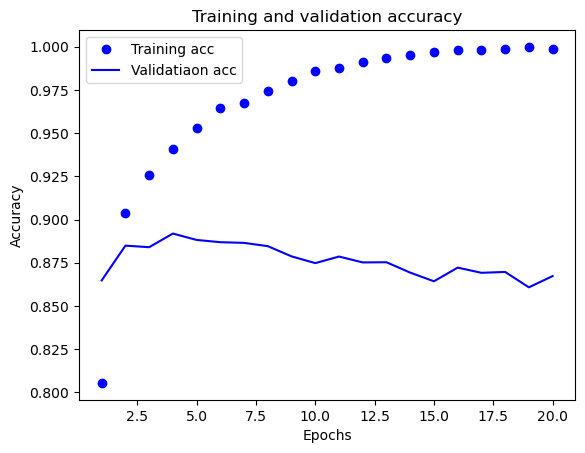

In [25]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validatiaon acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 4ms/step - loss: 0.4587 - accuracy: 0.8232
Epoch 2/4
49/49 [==============================] - 0s 4ms/step - loss: 0.2618 - accuracy: 0.9097
Epoch 3/4
49/49 [==============================] - 0s 4ms/step - loss: 0.2026 - accuracy: 0.9279
Epoch 4/4
782/782 [==============================] - 19s 24ms/step - loss: 0.3167 - accuracy: 0.8740


In [27]:
results

[0.3167440593242645, 0.8740000128746033]

In [28]:
model.predict(x_test)

782/782 [==============================] - 19s 24ms/step


array([[0.15744868],
       [0.99975115],
       [0.35979056],
       ...,
       [0.09489669],
       [0.04096024],
       [0.4682461 ]], dtype=float32)